<a href="https://colab.research.google.com/github/Sachin3007/TSF_Task-1/blob/main/Student_percentage_prediction_using_Supervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **Sachinkumar Yadav  
Task-1:Prediction using Supervised ML**

**Importing Libraries**

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Importing dataset from URL**

In [12]:
dataset = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
print("Dataset imported successfully!!")
dataset

Dataset imported successfully!!


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


**Exploring Data**

In [13]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [15]:
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [16]:
dataset.head(25)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [17]:
dataset.shape

(25, 2)

In [19]:
dataset.info

<bound method DataFrame.info of     Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86>

In [20]:
X = dataset.iloc[:,:-1].values
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [23]:
Y = dataset.iloc[:,1:].values
Y

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]])

**Data Visualization**

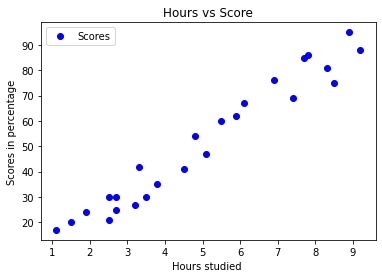

In [28]:
dataset.plot(x="Hours",y="Scores",style="o",c="blue")
plt.xlabel("Hours studied ")
plt.ylabel("Scores in percentage")
plt.title("Hours vs Score")
plt.show()

**Preparation of data**

In [29]:
x= dataset[["Hours"]]
y= dataset["Scores"]

**Spliting data into training and test sets by using Scikit-Learn's built-in train_test_split() method**

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state= 0)

**Training the Algorithm**

In [31]:
from sklearn.linear_model import LinearRegression
lin =LinearRegression()
lin.fit(x_train, y_train)

print("Training completed")

Training completed


In [32]:
print(lin.intercept_)
print(lin.coef_)

2.018160041434662
[9.91065648]


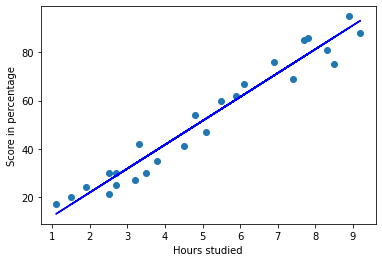

In [33]:
line = lin.coef_*x + lin.intercept_
plt.scatter(x,y)
plt.plot(x, line, c="b")
plt.xlabel("Hours studied")
plt.ylabel("Score in percentage")
plt.show()

In [34]:
print(x_test)
y_pred = lin.predict(x_test)

    Hours
5     1.5
2     3.2
19    7.4
16    2.5
11    5.9


**Comparing Actual vs Predicted**

In [35]:
data1 = pd.DataFrame({'Actual': y_test, 'predicted':y_pred})
data1

,Actual,predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


In [36]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002982


 **Predicted score if a student studies for 9.25 hrs/ *day***

In [37]:
hours=[[9.25]]
pred_value = lin.predict(hours)
print('Number of hours :{}'.format(hours))
print('Predicted score: {} '.format(pred_value[0]))

Number of hours :[[9.25]]
Predicted score: 93.69173248737539 


# **Hence, Predicted score if a student studies for 9.25 hrs/ day is 93.69%**